# 10 菜品摆放-数据可视化
字不如表，表不如图，借助图形来清晰有效表达信息的方式叫可视化，可视化可以帮助我们更好地传递信息

In [1]:
import pandas as pd
import numpy as np

# 导入matplotlib库中的额pyplot
import matplotlib.pyplot as plt
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus'] = False
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 一、数据可视化的基本流程
* **整理数据**<br>
    明确把那些数据可视化
* **明确目的**<br>
    要明确表达什么，传递给看图人那些信息
* **寻找合适的表现形式**<br>
    选择折线图还是饼图等
    
## 二、图标的基本组成元素

<img src='./image/chart.jpg' width='60%' />

* **画布**<br>
    首先需要找到一块“布”，即绘图界面，然后在该“布”上绘制图表。画布是图表最大的概念
* **坐标系**<br>
    画布是图表最大的概念，可以在画布上建立多个坐标系，分为直角坐标系，球坐标系和极坐标系。直角坐标系最为常见
* **坐标轴**<br>
    坐标轴是坐标系中的概念，主要有x轴，y轴（二维），一组x/y值唯一确定坐标系中的点<br>
    x轴也称为横轴，即上图中的月份；y轴也称为纵轴，即上图中的注册人数
* **坐标轴标题**<br>
    x轴和y轴的坐标名称，即上图中的月份和注册人数
* **图表标题**<br>
    整个图标的核心标题
* **数据标签**<br>
    数据标签用于展示图表中的数值，即每个点对应展示的数值
* **数据表**<br>
    数据表在图下方，以表格形式展示出来
* **网格线**<br>
    网格线是坐标轴的延伸，可以清楚的看到每个点在大概什么位置，值是多少
* **图例**<br>
    不同符号或颜色代表不同的内容与指标
* **误差线**<br>
    误差线主要用来表示坐标轴上每个点的不确定程度，一般用标准差表示，即一个点的误差为该点的实际加减标准差

## 三、建立画布和坐标系
### 3.1 建立画布

In [2]:
fig = plt.figure()
# figsize：用宽高
plt.figure(figsize=(8,6))
# 建立画布以后并不会直接显示出来，只能输出一串画布相关信息的代码

<Figure size 576x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

### 3.2 用add_subplot函数建立坐标系
前提：先有画布

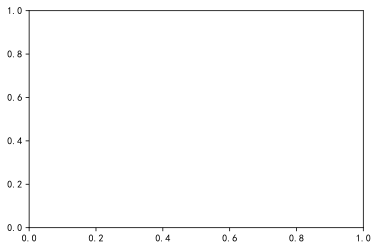

In [3]:
fig = plt.figure()
# 在画布上建立1*1个坐标系
ax1 = fig.add_subplot(1, 1, 1)

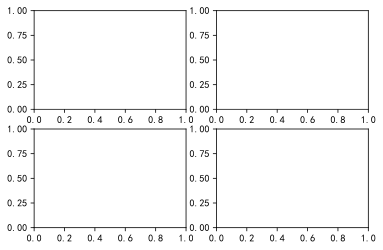

In [4]:
# 在画布上建立2*2个坐标系，即4个坐标系
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

### 3.3 用plt.subplot2grid函数建立坐标系
不需要先建立画布

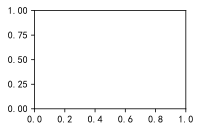

In [5]:
# 在整个区域分成2行2列，且在(0,0)位置绘图
plt.subplot2grid((2, 2), (0, 0))

<BarContainer object of 6 artists>

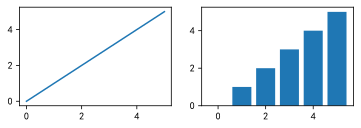

In [6]:
# 用这种方式建立坐标系，绘图代码要跟在坐标系语句后面
# 如：绘制2行2列，在（0，0）位置做折线图，在（0，1）位置做柱形图
x = np.arange(6)
y = np.arange(6)
plt.subplot2grid((2, 2), (0, 0))
plt.plot(x, y)

plt.subplot2grid((2, 2), (0, 1))
plt.bar(x, y)

### 3.4 用plt.subplot函数建立坐标系
与plt.subplot2grid函数类似

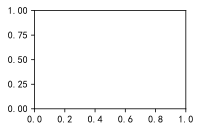

In [7]:
plt.subplot(2, 2, 1)

<BarContainer object of 6 artists>

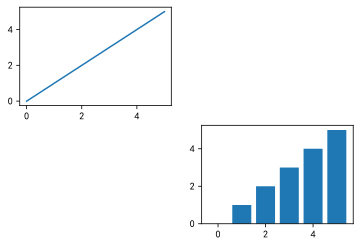

In [8]:
# 将整个区域分为2行2列，在第1个坐标系上画折线图，在第4个坐标系上做柱状图
x = np.arange(6)
y = np.arange(6)

plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.subplot(2, 2, 4)
plt.bar(x, y)

### 3.5 用plt.subplots函数建立坐标系
subplots和subplot、subplot2grid函数不同之处是：它们每次只返回一个坐标系，而subplots一次可以返回多个坐标系

<BarContainer object of 6 artists>

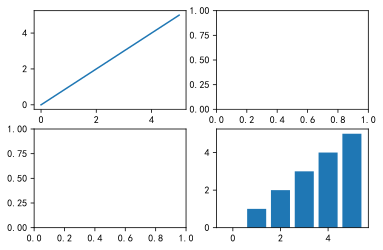

In [9]:
# 整个区域分成2行2列，并将4个坐标系全部返回
fig, axes = plt.subplots(2, 2)

# 通过axes[x, y]指明在哪个坐标系绘制
x = np.arange(6)
y = np.arange(6)

axes[0, 0].plot(x, y)
axes[1, 1].bar(x, y)

### 3.6 几种创建坐标系方法的区别
* 第一种方法add_subplot属于对象式编程，所有操作都是针对某个对象进行的，建立画布-》在画布上建立坐标系-》在坐标系上绘图
* 后面三种属于函数式编程，比较简洁精炼，直接调用plt中某个函数就直接达到创建坐标系的目的

对象式编程的代码比较反锁，但是便于理解；函数式编程虽然代码简洁，但是不利于新人掌握整体的绘图原理

建议刚开始学对象式编程，便于理解，后面熟悉了在使用函数式编程

函数式编程不仅体现在创建坐标系中。后面可能还有和对象式编程交叉使用

## 四、设置坐标轴
### 4.1 设置坐标轴的标题

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

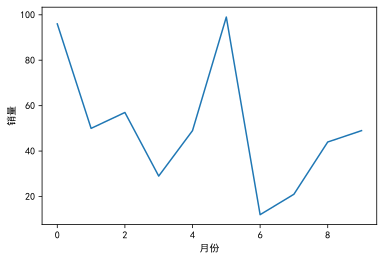

In [31]:
plt.subplot(1, 1, 1)

x = np.arange(10)
y = np.random.randint(10, 100, 10)

plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('销量')

# fig, ax = plt.subplots(2, 2)
# ax[0, 0].plot([1, 2, 3, 4], [1, 4, 2, 3])

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

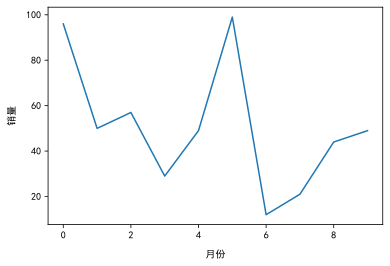

In [32]:
# 设置xlabel、ylabel到x轴和y轴的距离，参数labelpad
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('销量', labelpad=10)

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

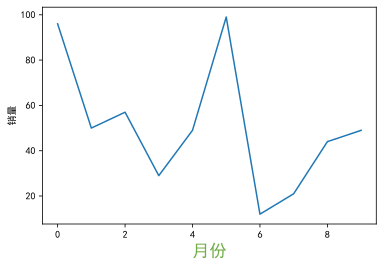

In [33]:
# 设置xlabel、ylabel文本相关性质，如：字体大小、字体颜色、是否加粗等
plt.plot(x, y)
plt.xlabel('月份', fontsize='xx-large', color='#70AD47', fontweight='bold')
plt.ylabel('销量')

### 4.2 设置坐标轴的刻度
plt.xticks(ticks, labels)

plt.yticks(ticks, labels)

* ticks：刻度值
* labels：该刻度对应的标签
* 相关性质和xlabel、ylabel设置一致

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

([<matplotlib.axis.XTick at 0x119bf2e90>,
 <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x119bf8bd0>,
 <a list of 9 Text yticklabel objects>)

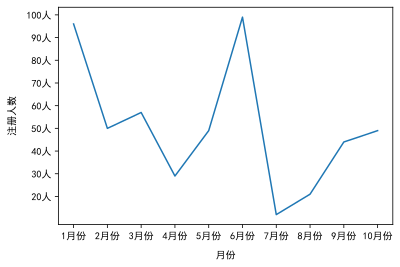

In [39]:
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('注册人数', labelpad=10)
plt.xticks(np.arange(10), ['1月份', '2月份', '3月份', '4月份', '5月份', '6月份', '7月份', '8月份', '9月份', '10月份'])
plt.yticks(np.arange(20, 110, 10), ['20人', '30人', '40人', '50人', '60人', '70人', '80人', '90人', '100人', '110人'])

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

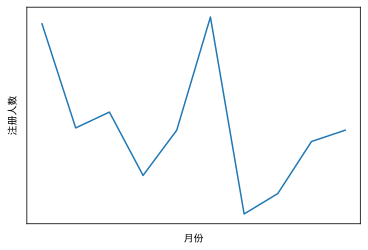

In [41]:
# 隐藏坐标轴刻度
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('注册人数', labelpad=10)
plt.xticks([])
plt.yticks([])

#### plt库中的tick_params函数对轴刻度线进行设置

```
plt.tick_prams(axis, reset, which, direction, length, width, color, 
               pad, labelsize, labelcolor, bottom, top, left, right, 
               labelbottom, labeltop, labelleft, labelright)
```

<img src='./image/plt_tick_params.jpg' width='65%' />

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

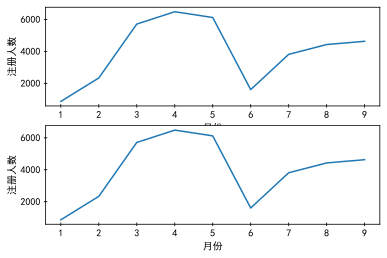

In [43]:
# 例：在2*1坐标系中，第一个坐标系中绘图，轴刻度线绘制成双向且下轴刻度线不显示
# 同时在第2个坐标系中绘图，轴刻度线成双向且下轴刻度标签不显示
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# [start, end)
# step = 1
x = np.arange(1, 10, 1)
y = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')

# 下轴刻度线不显示
plt.tick_params(axis = 'both', which='both', direction='inout', bottom='false')

# 下轴刻度标签不显示
plt.subplot(2, 1, 2)
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
plt.tick_params(axis = 'both', which='both', direction='inout', labelbottom='false')

### 4.3 设置坐标轴的范围
设置坐标轴的最大值和最小值

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

(0, 10)

(0, 8000)

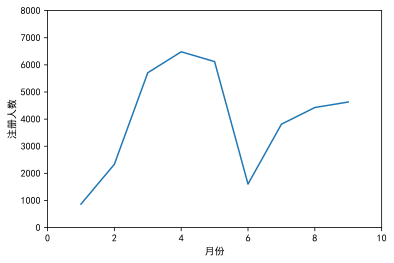

In [45]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
plt.xlim(0, 10)
plt.ylim(0, 8000)

### 4.4 坐标轴的轴显示设置

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

(0.6, 9.4, 585.2, 6762.8)

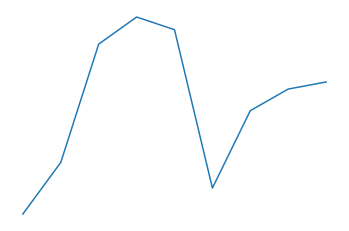

In [46]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 关闭轴显示
plt.axis('off')

## 五、其他图表格式设置
### 5.1 网格线设置
网格线是相比于坐标轴更小的单位，默认是关闭的，通过修改b='True'来显示

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

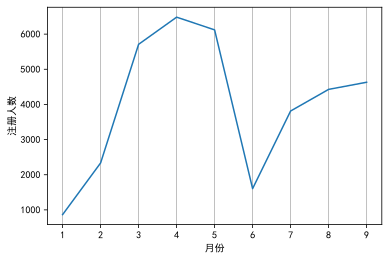

In [52]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 显示网格线
# plt.grid(b='True')
# axis控制哪个轴网格线显示
plt.grid(b='True', axis='x')

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

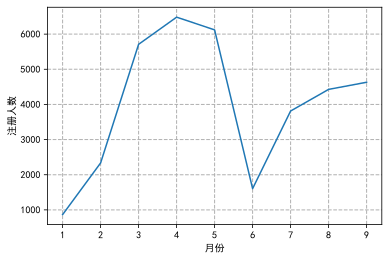

In [53]:
# 设置网格线样式，如线宽、线型、线的颜色
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 虚线、线宽为1
plt.grid(b='True', linestyle='dashed', linewidth=1)

### 5.2 设置图例

<BarContainer object of 9 artists>

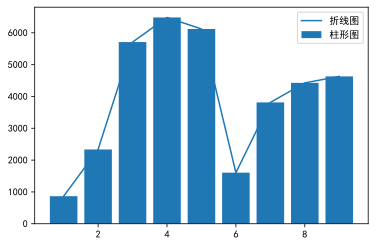

In [56]:
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend()

#### 5.2.1 loc参数调整图例位置
loc参数，可以传入loc字符串，也可以传入位置代码

<img src='./image/legend_loc.jpg' width='65%' />

<BarContainer object of 9 artists>

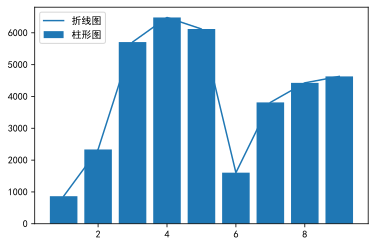

In [59]:
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend(loc='upper left')
plt.legend(loc=2)

#### 5.2.2 图例默认显示1列，参数ncol设置显示列数

<BarContainer object of 9 artists>

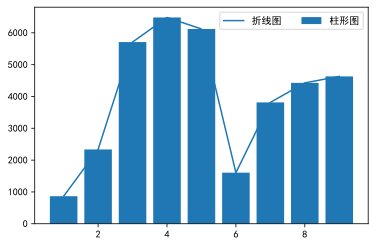

In [60]:
# 图例默认显示1列，参数ncol设置显示列数
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend(ncol = 2)

#### 5.2.3 其他参数
<img src='./image/legend_other.jpg' width='65%' />

## 5.3 图表标题设置

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

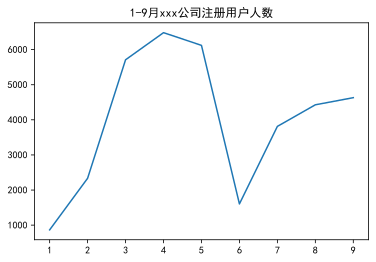

In [63]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')

#### 5.3.1 loc参数修改标题显示位置
默认居中显示

* center：居中显示
* left：靠左
* right：靠右

Text(1.0, 1.0, '1-9月xxx公司注册用户人数')

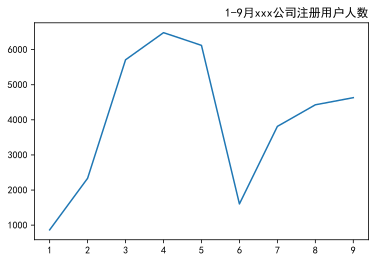

In [64]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数', loc='right')

#### 5.3.2 fontdict参数修改标题相关性性质

### 5.4 设置数据标签
坐标值对应位置显示相应的数值，可以利用text函数实现

plt.text(x, y, str, ha, va, fontsize)

text函数参数说明：

<img src='./image/plt_text.jpg' width='80%' />

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(5, 1605, '极值点')

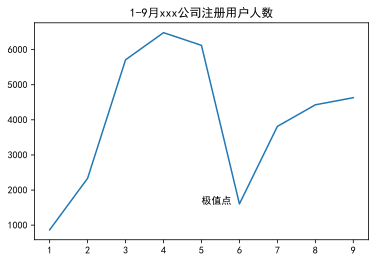

In [65]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
plt.text(5, 1605, '极值点')

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(1, 866, '866')

Text(2, 2335, '2335')

Text(3, 5710, '5710')

Text(4, 6482, '6482')

Text(5, 6120, '6120')

Text(6, 1605, '1605')

Text(7, 3813, '3813')

Text(8, 4428, '4428')

Text(9, 4631, '4631')

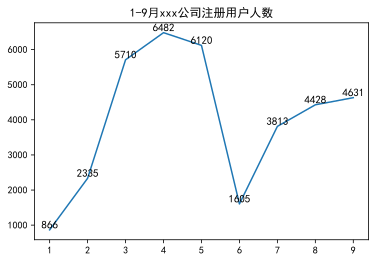

In [67]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
# 所有点显示数据标签，需要利用for循环
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

### 5.5 图表注释

plt.annotate(s, xy, xytext, arrowprops)

<img src='./image/plt_annotate.jpg' width='80%' />

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(7, 1605, '服务器宕机了')

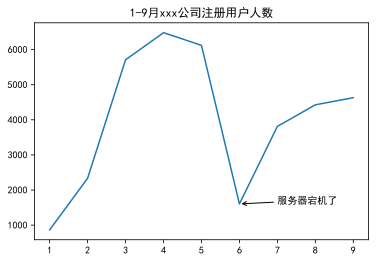

In [75]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
# facecolor: 箭的颜色
# arrowstyle：箭的类型
# '-' '->' '-[' '<-' '<->' '<' 'fancy' 'simple' 'wedge'
plt.annotate('服务器宕机了', xy=(6, 1605), xytext=(7, 1605), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

### 5.6 数据表
数据表在图表基础上再添加一个表格

plt.table(cellText=None, cellColours=None, cellLoc='right',

    colWidths=None, rowLabels=None, rowColours=None, rowLoc='left',
    
    colLabels=None, colColours=None, colLoc='center', loc='bottom')

<img src='./image/plt_table.jpg' width='80%' />
<img src='./image/plt_table2.jpg' width='80%' />

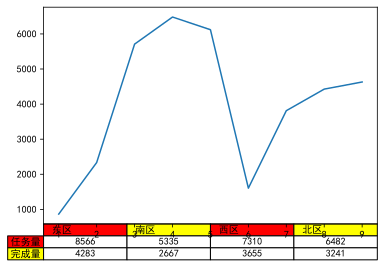

In [79]:
plt.plot(x, y)
cellText = [[8566, 5335, 7310, 6482], [4283, 2667, 3655, 3241]]
rows = ['任务量', '完成量']
columns = ['东区', '南区', '西区', '北区']
plt.table(cellText=cellText,
         cellLoc='center',
         rowLabels=rows,
         rowColours=['red', 'yellow'],
         rowLoc='center',
         colLabels=columns,
         colColours=['red', 'yellow', 'red', 'yellow'],
         colLoc='left',
         loc='bottom')

## 六、绘制常用图表
### 6.1 绘制折线图
折线图：随时间推移某指标的变化趋势

plt.plot(x, y, color, linestyle, linewidth, marker, 

    markeredgecolor, markeredgwidth, markerfacecolor, marksize, label)

* x，y：x轴和y轴的数据，必选项，其他参数都是可选项
* color：折线图的颜色

<img src='./image/plt_plot_color.jpg' width='60%' />

颜色不同使用方式

<img src='./image/plt_plot_color2.jpg' width='60%' />

linestyle：线的风格

<img src='./image/plt_plot_linestyle.jpg' width='60%' />

linewidth：线的宽度，浮点数

marker：每点标记物的形状

<img src='./image/plt_plot_marker.jpg' width='60%' />

marker相关参数说明：

<img src='./image/plt_plot_marker2.jpg' width='60%' />

Text(0.5, 1.0, 'XXX公司1-9月注册用户量')

Text(1, 866, '866')

Text(2, 2335, '2335')

Text(3, 5710, '5710')

Text(4, 6482, '6482')

Text(5, 6120, '6120')

Text(6, 1605, '1605')

Text(7, 3813, '3813')

Text(8, 4428, '4428')

Text(9, 4631, '4631')

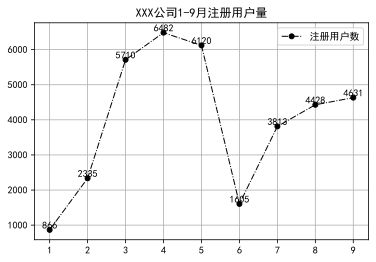

In [81]:
# xxx公司1-9月注册用户量
# 建立一个坐标系
plt.subplot(1, 1, 1)

x = np.arange(1, 10)
y = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])

# 绘图
plt.plot(x, y, color='k', linestyle='dashdot', linewidth=1, marker='o', markersize=5, label='注册用户数')

# 设置标题，标题名和标题位置
plt.title('XXX公司1-9月注册用户量', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
    
# 设置网格线
plt.grid(True)

# 设置图例
plt.legend()

# 保存图表到本地
plt.savefig('./image/plt_plot_save.jpg')

### 6.2 绘制柱形图
柱形图：比较不同类别之间的数据情况

plt.bar(x, height, width=0.8, bottom=None, align='center', color, edgecolor)

<img src='./image/plt_bar.jpg' width='60%' />

#### 6.2.1 普通柱形图

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量')

Text(东区, 8566, '8566')

Text(北区, 6482, '6482')

Text(南区, 5335, '5335')

Text(西区, 7310, '7310')

Text(0.5, 0, '分区')

Text(0, 0.5, '任务量')

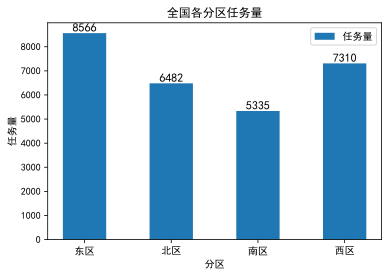

In [83]:
# 全国各分区任务量
plt.subplot(1, 1, 1)
x = np.array(['东区', '北区', '南区', '西区'])
y = np.array([8566, 6482, 5335, 7310])

plt.bar(x, y, width=0.5, align='center', label='任务量')

plt.title('全国各分区任务量', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    
plt.xlabel('分区')
plt.ylabel('任务量')

plt.legend()

plt.savefig('./image/plt_bar_save.jpg')

#### 6.2.2 簇状柱形图
不同类别随着同一变量的变化情况

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量和完成量')

Text(1, 8566, '8566')

Text(2, 6482, '6482')

Text(3, 7310, '7310')

Text(4, 6482, '6482')

Text(1.3, 4283, '4283')

Text(2.3, 2667, '2667')

Text(3.3, 3655, '3655')

Text(4.3, 3241, '3241')

Text(0.5, 0, '区域')

Text(0, 0.5, '任务情况')

([<matplotlib.axis.XTick at 0x11d802dd0>,
 <a list of 4 Text xticklabel objects>)

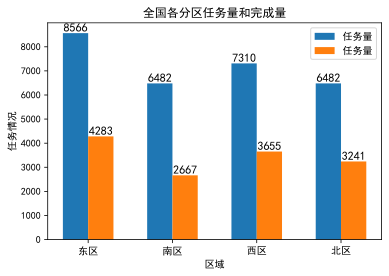

In [85]:
# 全国各分区任务量和完成量的簇状柱形图
# 全国各分区任务量
plt.subplot(1, 1, 1)
x = np.array([1, 2, 3, 4])
y1 = np.array([8566, 6482, 7310, 6482])
y2 = np.array([4283, 2667, 3655, 3241])

# 柱形图的宽度为0.3
plt.bar(x, y1, width=0.3, label='任务量')
# x+0.3 相当于把完成量的每个柱子右移0.3
plt.bar(x+0.3, y2, width=0.3, align='center', label='任务量')

plt.title('全国各分区任务量和完成量', loc='center')

# 添加数据标签
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
for a, b in zip(x+0.3, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    
plt.xlabel('区域')
plt.ylabel('任务情况')

# 设置x轴刻度值
plt.xticks(x+0.15, ['东区', '南区', '西区', '北区'])

plt.grid(False)

plt.legend()

plt.savefig('./image/plt_bar_save2.jpg')

#### 6.2.3 堆积柱形图
堆积柱形图常用来比较同类别各变量和不同类别变量的总和差异，在x位置绘制不同的y，就会自动增加

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量和完成量')

Text(1, 8566, '8566')

Text(2, 6482, '6482')

Text(3, 7310, '7310')

Text(4, 6482, '6482')

Text(1, 4283, '4283')

Text(2, 2667, '2667')

Text(3, 3655, '3655')

Text(4, 3241, '3241')

Text(0.5, 0, '区域')

Text(0, 0.5, '任务情况')

([<matplotlib.axis.XTick at 0x11e210210>,
 <a list of 4 Text xticklabel objects>)

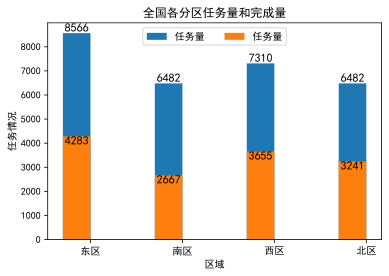

In [93]:
# 全国各分区任务量和完成量的堆积柱形图
plt.subplot(1, 1, 1)
x = np.array([1, 2, 3, 4])
y1 = np.array([8566, 6482, 7310, 6482])
y2 = np.array([4283, 2667, 3655, 3241])

# 柱形图的宽度为0.3
plt.bar(x, y1, width=0.3, label='任务量')
# x+0.3 相当于把完成量的每个柱子右移0.3
plt.bar(x, y2, width=0.3, align='center', label='任务量')

plt.title('全国各分区任务量和完成量', loc='center')

# 添加数据标签
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='top', fontsize=12)
    
plt.xlabel('区域')
plt.ylabel('任务情况')

# 设置x轴刻度值
plt.xticks(x+0.15, ['东区', '南区', '西区', '北区'])

plt.grid(False)

plt.legend(loc='upper center', ncol=2)

plt.savefig('./image/plt_bar_save3.jpg')